# Predicting the Sale Price of Bulldozers using Machine Learning

We're going to take the following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation



## 1. Problem Definition

In a statement,
>Predict the auction sale price for a piece of heavy equipment to create a "blue book" for bulldozers.

## 2. Data

The data is downloaded  from the Kaggle BlueBook for Bulldozers competition: https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

There are three main datasets:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation

> The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

## 4. Features

Data dictionary can be found on Google Sheets:

https://docs.google.com/spreadsheets/d/10eGdebLHsz_DDU7-EX7LjLLfyoWAfFRT/edit#gid=1773391120


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Project2/')
!pwd

/content/drive/My Drive/Colab Notebooks/Project2


In [3]:
# Regular EDA (Exploratory Data Analysis) and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import sklearn

# We want our plots to appear in the notebook
%matplotlib inline

### Load Data

In [ ]:
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False)
df.shape

(412698, 53)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [ ]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [ ]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

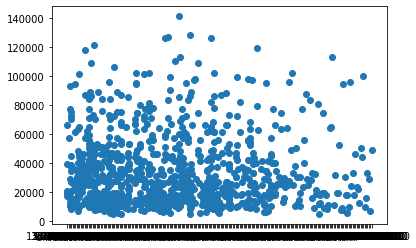

In [ ]:
number_of_dates = 1000
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:number_of_dates], df["SalePrice"][:number_of_dates]);

<Axes: >

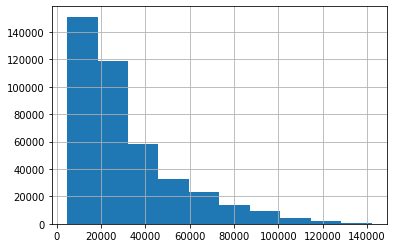

In [ ]:
df["SalePrice"].hist()

### Parsing Dates

When we work with time series data, we want to enrich the time & date components as much as possible.



In [ ]:
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False, parse_dates = ["saledate"])
df.shape

(412698, 53)

In [ ]:
df["saledate"].dtype

dtype('<M8[ns]')

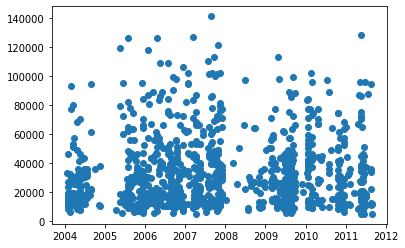

In [ ]:
number_of_dates = 1000
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:number_of_dates], df["SalePrice"][:number_of_dates]);

In [ ]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# See all columns
df.head().T 

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### Sort DataFrame by saledate

In [ ]:
# Sort DataFrame in date order
df.sort_values(by = ["saledate"], inplace = True, ascending = True)
df["saledate"].head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original DataFrame



In [ ]:
df_tmp = df.copy()

### Add datetime parameters for saledate column

In [ ]:
df_tmp["saleYear"] = df_tmp["saledate"].dt.year
df_tmp["saleMonth"] = df_tmp["saledate"].dt.month
df_tmp["saleDay"] = df_tmp["saledate"].dt.day
df_tmp["saleDayOfWeek"] = df_tmp["saledate"].dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp["saledate"].dt.dayofyear

In [ ]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


We can remove saledate column

In [ ]:
df_tmp.drop("saledate", axis = 1, inplace = True)

In [ ]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

In [ ]:
df_tmp["state"].value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## 4. Modelling

Do model driven EDA

In [ ]:
np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs = -1)
model.fit(df_tmp.drop("SalePrice", axis = 1), df_tmp["SalePrice"])

ValueError: ignored

### Convert string to categories

In [ ]:
pd.api.types.is_string_dtype(df_tmp.UsageBand)

True

In [ ]:
for label, content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [ ]:
for label, content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    df_tmp[label] = content.astype("category").cat.as_ordered()

In [ ]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

### Save preprocessed data

In [ ]:
df_tmp.to_csv("data/bluebook-for-bulldozers/train_tmp.csv", index = False)

In [4]:
df_tmp = pd.read_csv("data/bluebook-for-bulldozers/train_tmp.csv", low_memory=False)
df_tmp.shape

(412698, 57)

In [5]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


### Fill numeric missing values

In [6]:
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [7]:
# Which numeric columns have null values
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

auctioneerID
MachineHoursCurrentMeter


In [8]:
# Fill the numeric rows with the median
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      # Add a binary column which tells us if the data was missing
      df_tmp[label + "_is_missing"] = pd.isnull(content)
      # Fill the numerical values with median
      df_tmp[label] = content.fillna(content.median)

In [9]:
# Which numeric columns have null values
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

### Fill categorical missing values

In [10]:
for label, content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
    print(label)

auctioneerID
MachineHoursCurrentMeter
UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [11]:
# Fill the categorical rows with the median
for label, content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
    # Add a binary column which tells us if the data was missing
    df_tmp[label + "_is_missing"] = pd.isnull(content)
    # Fill the numerical values with median
    df_tmp[label] = pd.Categorical(content).codes + 1

In [12]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(1), int16(5), int64(10), int8(41)
memory usage: 72.8 MB


In [13]:
# Which numeric columns have null values
for label, content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
      print(label)

In [ ]:
%%time
np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs = -1)
model.fit(df_tmp.drop("SalePrice", axis = 1), df_tmp["SalePrice"])

CPU times: user 15min 31s, sys: 4.37 s, total: 15min 35s
Wall time: 9min 4s


RandomForestRegressor(n_jobs=-1)

In [ ]:
model.score(df_tmp.drop("SalePrice", axis = 1), df_tmp["SalePrice"])

0.9874801428048305

In [14]:
# Split data into training and validation
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

In [15]:
# Split data into X and y
X_train, y_train = df_train.drop("SalePrice", axis = 1), df_train["SalePrice"]
X_valid, y_valid = df_val.drop("SalePrice", axis = 1), df_val["SalePrice"]

### Building an evaluation function

In [16]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmlse(y_test, y_preds):
  """
  Calculates RMLSE
  """
  return np.sqrt(mean_squared_log_error(y_test, y_preds))

In [17]:
def show_scores(model):
  train_preds = model.predict(X_train)
  val_preds = model.predict(X_valid)
  scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
            "Valid MAE": mean_absolute_error(y_valid, val_preds),
            "Training RMLSE": rmlse(y_train, train_preds),
            "Valid RMLSE": rmlse(y_valid, val_preds),
            "Training R^2": r2_score(y_train, train_preds),
            "Valid R^2": r2_score(y_valid, val_preds)}
  return scores

### Testing our model on a subset (to tune hyperparameters)

In [18]:
# Change max_samples value to improve training time
%%time
np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs = -1, max_samples = 10000)
model.fit(X_train, y_train)

CPU times: user 39.7 s, sys: 249 ms, total: 40 s
Wall time: 23.1 s


RandomForestRegressor(max_samples=10000, n_jobs=-1)

In [19]:
# Evaluation of the model
show_scores(model)

{'Training MAE': 5569.966734384545,
 'Valid MAE': 7177.30513522855,
 'Training RMLSE': 0.25815692814889707,
 'Valid RMLSE': 0.2932676701203707,
 'Training R^2': 0.8604244776147991,
 'Valid R^2': 0.8317275337770736}

 ### Hyperparaneter Tuning with RandomizedSearchCV

In [20]:
%%time
np.random.seed(42)
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Create a hyperparameter grid for Random Forest

rf_grid = {"n_estimators": np.arange(10, 100, 10),
        "max_depth": [None, 3,5,10],
        "min_samples_split": np.arange(2, 20, 2),
        "min_samples_leaf": np.arange(1, 20, 2),
        "max_features": [0.5, 1, "sqrt", "auto"],
        "max_samples": [10000]}


# Setup random hyperparameter search for RandomForestRegressor
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1), 
                           rf_grid,
                           cv=5,
                           n_iter=2,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestRegressor()
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: user 14.5 s, sys: 3.01 s, total: 17.5 s
Wall time: 50.4 s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [21]:
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 1,
 'max_depth': None}

In [22]:
# Evaluation of the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 8749.012673260246,
 'Valid MAE': 11031.595502303662,
 'Training RMLSE': 0.3863332705562861,
 'Valid RMLSE': 0.43931769828296513,
 'Training R^2': 0.6924217076260646,
 'Valid R^2': 0.6559091561308252}

### Train a model with best hyperparameters

In [25]:
%%time
ideal_model = RandomForestRegressor(n_jobs = -1, n_estimators = 40,
                                    min_samples_leaf = 1,
                                    min_samples_split = 14,
                                    max_features = 0.5,
                                    max_samples = None,
                                    random_state = 42)
ideal_model.fit(X_train, y_train)

CPU times: user 3min 39s, sys: 645 ms, total: 3min 40s
Wall time: 2min 23s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [26]:
# Evaluation of the ideal model
show_scores(ideal_model)

{'Training MAE': 2968.4373424129312,
 'Valid MAE': 6033.683486362387,
 'Training RMLSE': 0.14500253799740906,
 'Valid RMLSE': 0.24862303214648593,
 'Training R^2': 0.9584298501014805,
 'Valid R^2': 0.8783627523124771}

### Feature Importance

In [27]:
ideal_model.feature_importances_

array([3.46548351e-02, 1.87312120e-02, 4.43525199e-02, 1.76905843e-03,
       3.98371833e-03, 1.97022952e-01, 4.07225397e-03, 1.17992359e-03,
       4.85757216e-02, 3.38779401e-02, 6.61534931e-02, 4.68915462e-03,
       1.42196885e-02, 1.49553467e-01, 4.17976658e-02, 5.98267450e-03,
       2.74934254e-03, 4.09798366e-03, 3.56204523e-03, 7.88564567e-02,
       7.21859386e-04, 5.43415758e-05, 1.11675582e-03, 1.53941326e-04,
       9.39582310e-04, 2.86684390e-05, 2.01194275e-03, 8.15305139e-03,
       2.64470069e-03, 2.13268730e-03, 3.89339663e-03, 3.37238128e-03,
       3.83906651e-03, 2.74851977e-04, 4.17932188e-03, 7.49812671e-03,
       8.45509001e-04, 9.52059731e-03, 6.97443860e-04, 1.77363665e-03,
       8.29958477e-04, 9.11553753e-04, 5.56919066e-03, 6.10946325e-04,
       2.99431697e-04, 3.49549667e-04, 3.70307341e-04, 1.69618870e-03,
       7.97446611e-04, 2.67048680e-04, 1.60771081e-04, 7.19846947e-02,
       3.79520422e-03, 5.72034496e-03, 2.91176581e-03, 9.89896403e-03,
      

In [36]:
# Plotting feature importance

def plot_features(columns, importances, n = 20):
  df = (pd.DataFrame({"features": columns, "feature_importances": importances}).sort_values("feature_importances", ascending = False).reset_index(drop = True))
  fig, ax = plt.subplots()
  ax.barh(df["features"][:20],df["feature_importances"][:20])
  ax.set_ylabel("Features")
  ax.set_xlabel("Feature Importance")
  ax.invert_yaxis()

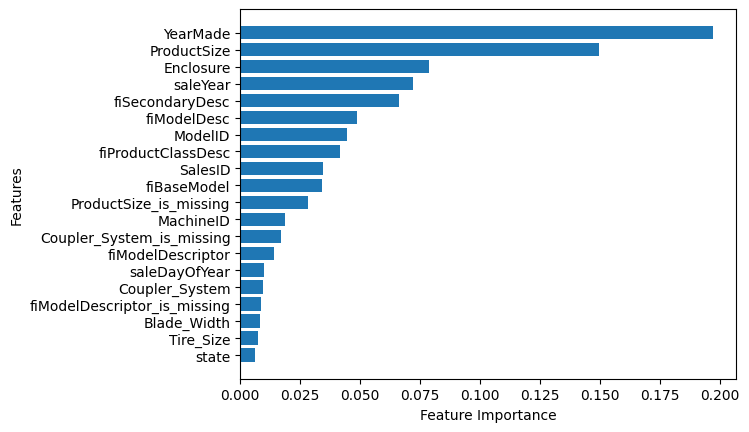

In [37]:
plot_features(X_train.columns, ideal_model.feature_importances_, n = 20)